## Load the Dataset

In [29]:
# Import Libraries
import pandas as pd
import numpy as np

In [30]:
#Load the CSV File
df = pd.read_csv("Telco-Customer-Churn.csv")


In [31]:
#Preview the Data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
#check the shape and data types.

df.shape           # Number of rows and columns
df.info()          # Column names, data types, missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Clean the Data

In [33]:
# Convert TotalCharges to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [34]:
#check for missing values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
# Drop or Fix Missing Values
df = df.dropna(subset=['TotalCharges'])


In [36]:
#confirm all missing values are now gone:

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
# Convert SeniorCitizen Column(changing 1 to Yes and 0 to No)
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


In [38]:
# convert the Churn column to numeric for modeling later
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [39]:
# Confirm Data Types Are Correct
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## Exploratory Data Analysis (EDA)

In this section, we explore the data to identify key patterns and potential drivers of churn.
We focus on feature distributions, relationships between features and churn, and correlation between numerical variables.


In [40]:
# Quick overview of numerical features
df.describe()


,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


### Churn Rate Overview

In [41]:
# Value counts and churn percentage
df['Churn'].value_counts(normalize=True) * 100


Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Churn is around 26%–27% of customers.

This means about 1 in 4 customers leave the company.

In business terms: Losing a quarter of your customers every year is expensive, because acquiring new ones costs more than retaining existing ones.

### Univariate Analysis (Categorical Features)
Looking into individual feature distributions

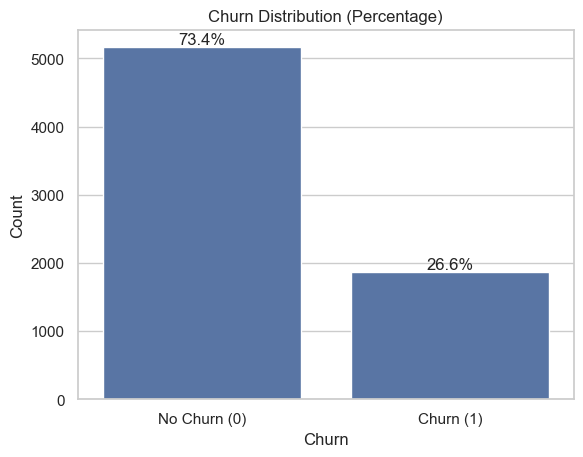

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Calculate percentages
churn_counts = df['Churn'].value_counts(normalize=True) * 100
churn_labels = churn_counts.index.map({0: 'No', 1: 'Yes'})  # Optional: map numeric to labels

# Plot
ax = sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (Percentage)')

# Annotate bars with percentage labels
for p, percentage in zip(ax.patches, churn_counts):
    height = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12)
ax.set_xticks([0, 1])  # Set tick positions explicitly
ax.set_xticklabels(['No Churn (0)', 'Churn (1)'])  # Now set labels


plt.ylabel('Count')
plt.xlabel('Churn')
plt.show()



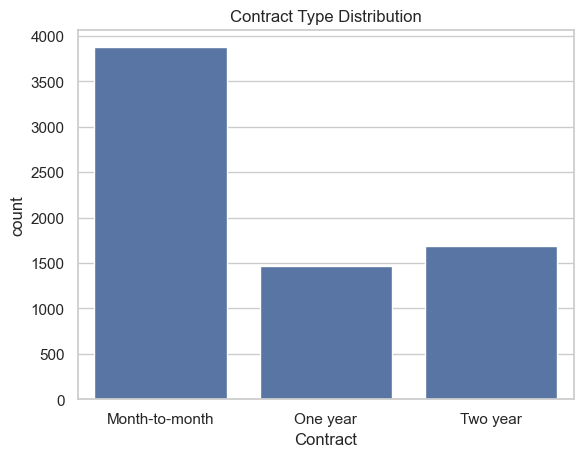

In [43]:
# Contract types
sns.countplot(x='Contract', data=df)
plt.title('Contract Type Distribution')
plt.show()


## Bivariate Analysis (Feature vs Churn)
This helps to discover which features are related to churn

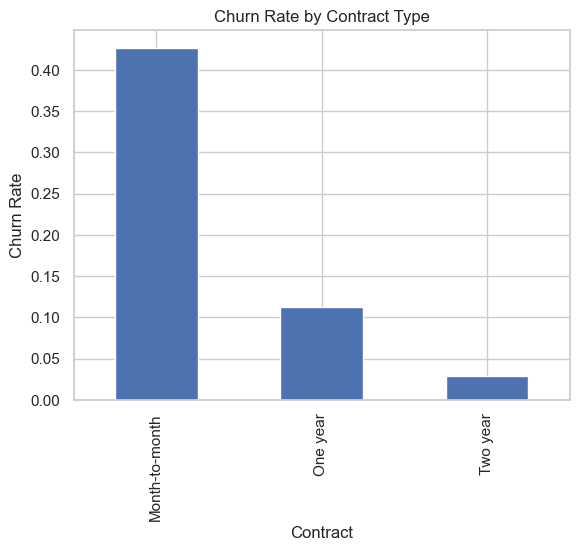

In [44]:
# Churn rate by Contract Type
# Group by contract type and churn
contract_churn = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

contract_churn.plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()



  contract Type & Churn
Month-to-month contract customers have the highest churn rate (over 40%).

One-year and two-year contract customers churn much less (below 15%).

Interpretation: Long-term contracts improve retention. The company should offer incentives for customers to sign long-term plans.


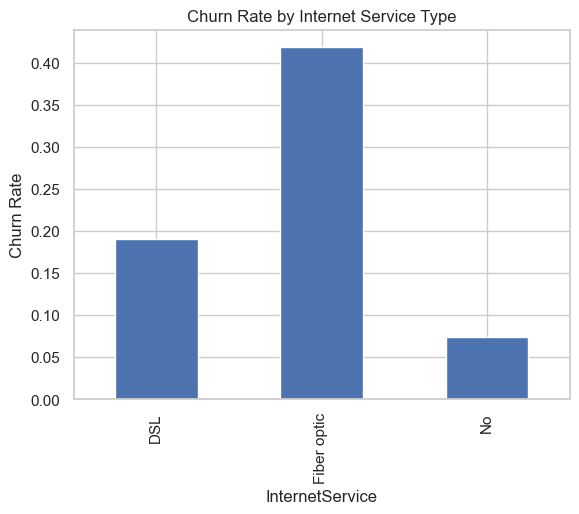

In [45]:
# Churn rate by Internet Service
df.groupby('InternetService')['Churn'].mean().plot(kind='bar')
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()


## Correlation Heatmap (Numerical Features Only)

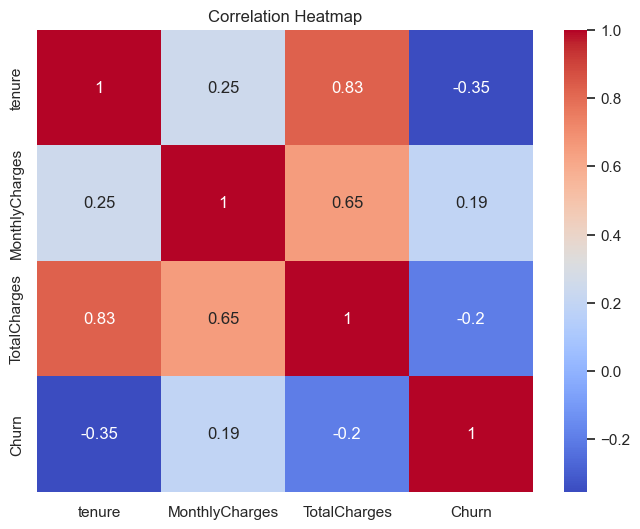

In [46]:
# Select numerical columns
num_cols = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Predictive Modeling

In [47]:
#  Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [48]:
# Since models can only take numeric values, we need to encode categorical variables
# Features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)


In [49]:

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [51]:
# Make Predictions
y_pred = log_model.predict(X_test)


Accuracy: 0.7867803837953091

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



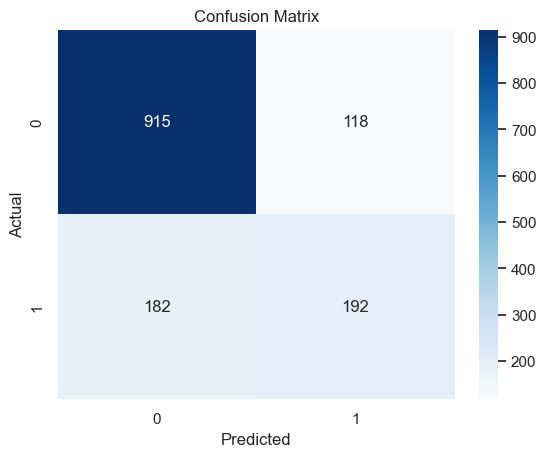

In [52]:
# Evaluate Model Performance
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [53]:
#Check feature importance to see which variables most influence churn:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


                                  Feature  Coefficient
10            InternetService_Fiber optic     1.097757
23                    StreamingMovies_Yes     0.371578
21                        StreamingTV_Yes     0.352592
8          MultipleLines_No phone service     0.346391
9                       MultipleLines_Yes     0.285242
26                   PaperlessBilling_Yes     0.276173
4                       SeniorCitizen_Yes     0.259622
28         PaymentMethod_Electronic check     0.257681
5                             Partner_Yes     0.050364
17                   DeviceProtection_Yes     0.042635
2                            TotalCharges     0.000332
1                          MonthlyCharges    -0.013091
7                        PhoneService_Yes    -0.019447
3                             gender_Male    -0.032122
15                       OnlineBackup_Yes    -0.061024
0                                  tenure    -0.061321
29             PaymentMethod_Mailed check    -0.073529
27  Paymen

## Output Interpretation
The coefficients represent the impact of each feature on the likelihood of churn:

Positive Coefficients: Increase the probability of churn.

Negative Coefficients: Decrease the probability of churn.

Here’s a summary of key insights from the output
Top Positive Influencers (Increase Churn Risk)
InternetService_Fiber optic (+1.10) Customers with fiber optic internet are more likely to churn. Possibly due to cost or service issues.

StreamingMovies_Yes (+0.37) Those who stream movies are slightly more prone to churn.

StreamingTV_Yes (+0.35) Similar trend with TV streaming.

MultipleLines_No phone service (+0.35) No phone service may correlate with less engagement.

PaperlessBilling_Yes (+0.28) Digital billing users show higher churn, possibly younger, tech-savvy customers.

Top Negative Influencers (Reduce Churn Risk)
Contract_Two year (−1.30) Long-term contracts strongly reduce churn, customers are locked in.

Contract_One year (−0.76) One-year contracts also reduce churn.

OnlineSecurity_Yes (−0.38) Security services help retain customers.

TechSupport_Yes (−0.36) Support access lowers churn, customers feel supported.

Dependents_Yes (−0.22) Customers with dependents are less likely to churn,  possibly more stable households.

Business Implications

Retention Strategy: Promote longer contracts and bundled services like tech support and online security.

Risk Segments: Monitor fiber optic users and streaming-heavy customers for dissatisfaction.

Personalization: Tailor offers to high-risk groups (e.g., paperless billing users) to reduce churn.

## Random Forest & XGBoost Modeling

In [54]:
# IMPORTS
!pip install xgboost

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [55]:
# RANDOM FOREST

rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results = []

results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, rf_pred),
    "Precision": precision_score(y_test, rf_pred),
    "Recall": recall_score(y_test, rf_pred),
    "F1-score": f1_score(y_test, rf_pred)
})
print(results[-1])


{'Model': 'Random Forest', 'Accuracy': 0.7853589196872779, 'Precision': 0.6323529411764706, 'Recall': 0.45989304812834225, 'F1-score': 0.5325077399380805}


In [56]:
# XGBOOST
# Handling imbalance: scale_pos_weight = ratio of non-churners to churners in training data

imbalance_ratio = (len(y_train) - sum(y_train)) / sum(y_train)

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    scale_pos_weight=imbalance_ratio,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "Precision": precision_score(y_test, xgb_pred),
    "Recall": recall_score(y_test, xgb_pred),
    "F1-score": f1_score(y_test, xgb_pred)
})

print(results[-1])


{'Model': 'XGBoost', 'Accuracy': 0.7370291400142146, 'Precision': 0.5039840637450199, 'Recall': 0.6764705882352942, 'F1-score': 0.5776255707762558}


In [57]:
# LOGISTIC REGRESSION (from before)

log_pred = log_model.predict(X_test)
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, log_pred),
    "Precision": precision_score(y_test, log_pred),
    "Recall": recall_score(y_test, log_pred),
    "F1-score": f1_score(y_test, log_pred)
})

In [58]:
# RESULTS COMPARISON TABLE
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df[["Model", "Accuracy", "Precision", "Recall", "F1-score"]]
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-score
0        Random Forest  0.785359   0.632353  0.459893  0.532508
1              XGBoost  0.737029   0.503984  0.676471  0.577626
2  Logistic Regression  0.786780   0.619355  0.513369  0.561404


In [59]:
# BEST MODEL HIGHLIGHT
best_model = comparison_df.sort_values(by="Recall", ascending=False).iloc[0]
print("\nBest model for churn prediction based on Recall:")
print(best_model)


Best model for churn prediction based on Recall:
Model         XGBoost
Accuracy     0.737029
Precision    0.503984
Recall       0.676471
F1-score     0.577626
Name: 1, dtype: object


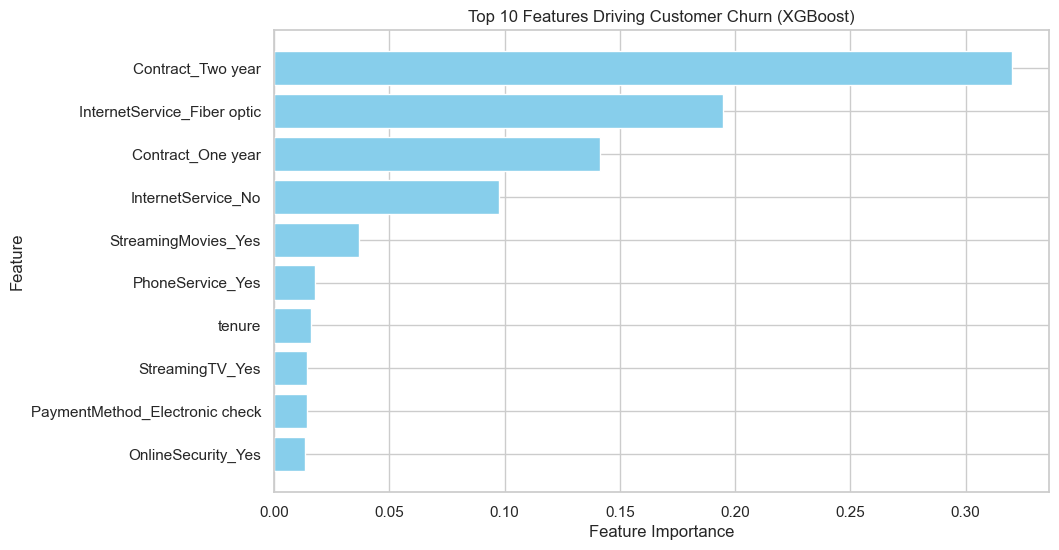

,Feature,Importance
25,Contract_Two year,0.320288
10,InternetService_Fiber optic,0.194728
24,Contract_One year,0.141149
11,InternetService_No,0.097312
23,StreamingMovies_Yes,0.036714
7,PhoneService_Yes,0.017467
0,tenure,0.016133
21,StreamingTV_Yes,0.014183
28,PaymentMethod_Electronic check,0.014030
13,OnlineSecurity_Yes,0.013459


In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance scores
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Highest at the top
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features Driving Customer Churn (XGBoost)")
plt.show()

# Optional: Display the full sorted list
importance_df


## Feature Importance Bar Chart Analysis
This bar chart highlights the top 10 features that most significantly influence customer churn predictions in the XGBoost model.
Contract_Two year stands out as the most impactful feature, suggesting that customers with longer contracts are far less likely to churn.

InternetService_Fiber optic ranks second, indicating that customers using fiber optic services may be more prone to churn — possibly due to service expectations or pricing.

Contract_One year and InternetService_No also show strong influence, reinforcing the role of contract type and internet availability in customer retention.

Entertainment-related features like StreamingMovies_Yes and StreamingTV_Yes appear in the top 10, hinting at lifestyle preferences that correlate with churn behavior.

PhoneService_Yes and tenure reflect customer engagement and loyalty duration, both contributing moderately to churn prediction.

This chart provides a strategic lens for businesses to identify high-risk customer segments and tailor retention efforts accordingly.

### SHAP Values for XGBoost

In [61]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


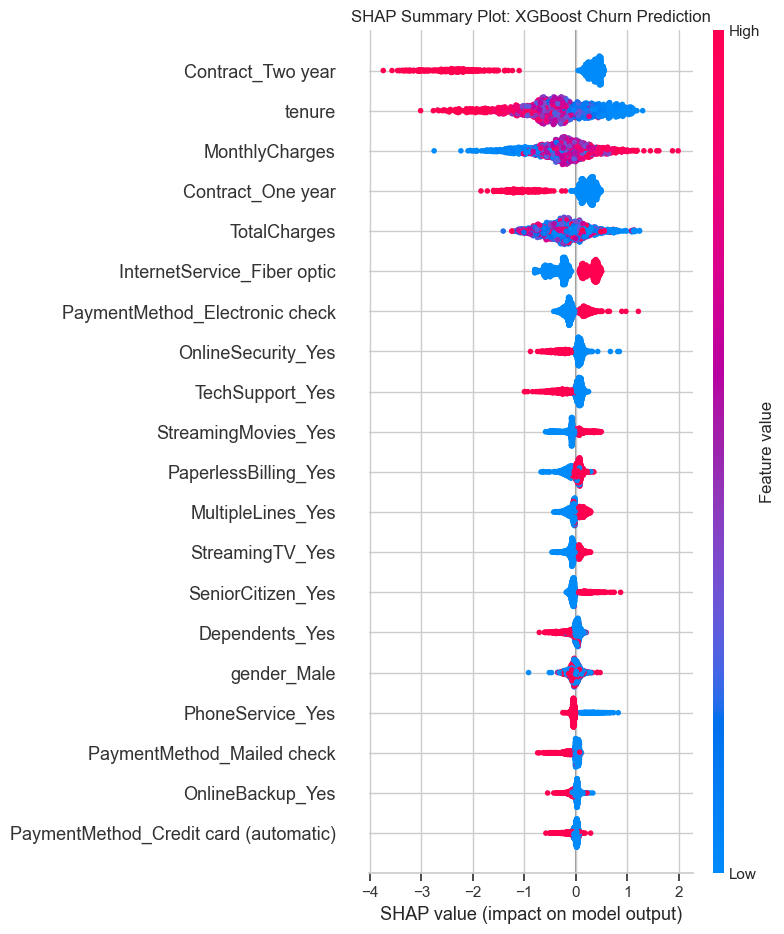

In [62]:
import shap
import matplotlib.pyplot as plt

# 1️⃣ Create SHAP explainer for your trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# 2️⃣ Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# 3️⃣ Summary plot (importance + direction)
plt.title("SHAP Summary Plot: XGBoost Churn Prediction")
shap.summary_plot(shap_values, X_test)


## SHAP Summary Plot Analysis
The SHAP summary plot provides a clear visualization of how each feature contributes to the churn prediction made by the XGBoost model. Features are ranked by importance, with Contract_Two year, tenure, and MonthlyCharges emerging as the most influential.

🔴 Red points indicate high feature values, while 🔵 blue points represent low values.

For example, customers with short tenure (blue) are more likely to churn, while those with long tenure (red) are less likely.

The Contract_Two year feature shows a strong negative SHAP value for high values, suggesting that long-term contracts significantly reduce churn risk.

Features like InternetService_Fiber optic and PaymentMethod_Electronic check are associated with higher churn probabilities, possibly due to service dissatisfaction or payment friction.

This plot not only highlights which features matter most, but also how their values push predictions toward or away from churn. It’s a powerful tool for interpreting model behavior and guiding business decisions.